In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns






In [2]:
#load data in dataframe
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(labels=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.label.value_counts()
#df.info()

ham     4825
spam     747
Name: label, dtype: int64

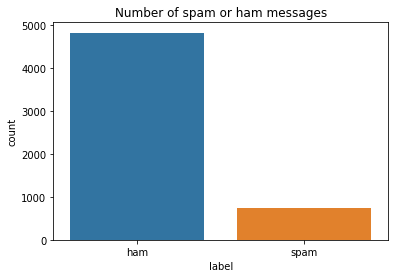

In [6]:
%matplotlib inline
plt.xlabel("label")
plt.title("Number of spam or ham messages")
sns.countplot(df.label)


In [7]:
df["label_as_num"] = df.label.map({"ham":0, "spam":1})

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

y = df['label']
x = df['text']
cv = CountVectorizer()
x = cv.fit_transform(x)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [10]:
print(x[0])
x.shape
#vect = CountVectorizer().fit(df['text'])
#vect.get_params()
#print(vect.vocabulary_)

  (0, 8267)	1
  (0, 1069)	1
  (0, 3594)	1
  (0, 7645)	1
  (0, 2048)	1
  (0, 1749)	1
  (0, 4476)	1
  (0, 8489)	1
  (0, 3634)	1
  (0, 1751)	1
  (0, 4087)	1
  (0, 5537)	1
  (0, 1303)	1
  (0, 2327)	1
  (0, 5920)	1
  (0, 4350)	1
  (0, 8030)	1
  (0, 3550)	1


(5572, 8672)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      1453
       spam       0.92      0.92      0.92       219

avg / total       0.98      0.98      0.98      1672



In [14]:
inp = "you win a plane ticket to dubai. contact urgent"#"we got password reset request from your id. click here to reset, if not you please ignore."#"you win a lottery. please click here to claim prize money."
inp1 = [inp]
inp1 = cv.transform(inp1).toarray()
clf.predict(inp1)

array(['spam'],
      dtype='<U4')

In [12]:
inp ="we got password reset request from your id. click here to reset, if not you please ignore."
inp1 = [inp]
inp1 = cv.transform(inp1).toarray()
clf.predict(inp1)


array(['ham'],
      dtype='<U4')